In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets  
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [41]:
# importing the boston housing dataset
data = pd.read_csv("./data/HousingData.csv")

In [42]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [43]:
#checking the number of rows and columns 
data.shape

(506, 14)

In [44]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [45]:
imputer = SimpleImputer(strategy='mean')
# Save the column names before applying the imputer
columns = data.columns

# Apply the imputer and convert back to a DataFrame with the original column names
data = pd.DataFrame(imputer.fit_transform(data), columns=columns)
# data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [46]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [47]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


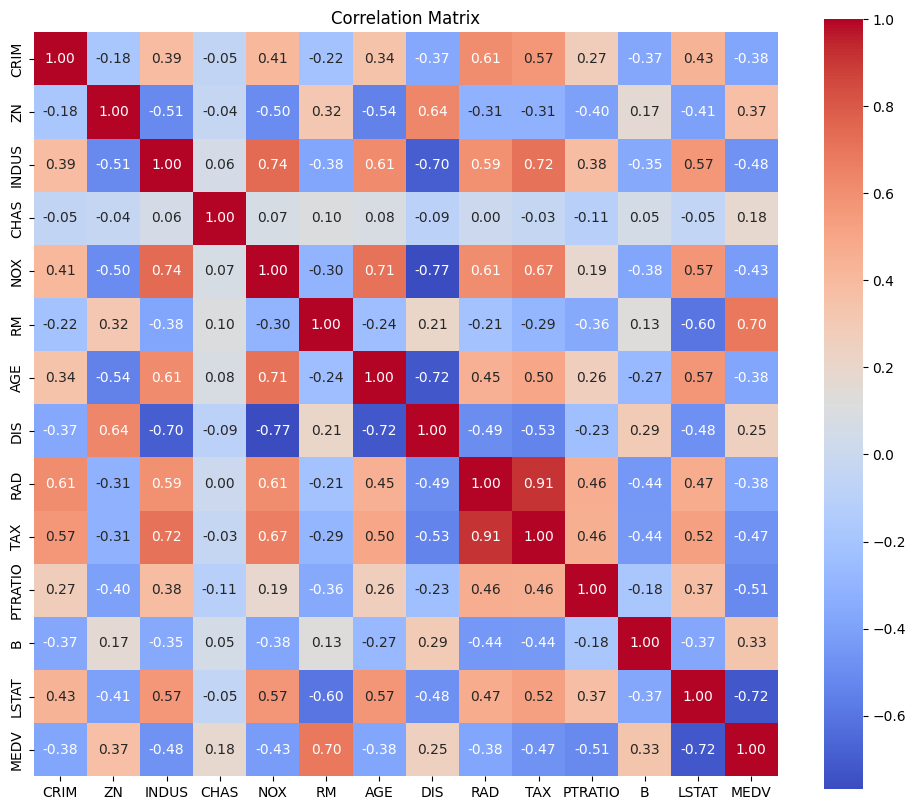

In [48]:
#plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 10}, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [49]:
X  = data.drop(["MEDV"], axis=1)
Y = data["MEDV"]

In [50]:
print(X)


        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050  1.0  273.0   

     PTRATIO       B      LSTAT  
0    

In [51]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [52]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [54]:
model = XGBRegressor()

In [56]:
model.fit(X_train, y_train)

print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [57]:
training_data_prediction = model.predict(X_train)

In [58]:
print(training_data_prediction)

[23.118767  21.013851  20.104101  34.701595  13.900053  13.505482
 21.995434  15.17749   10.876621  22.698492  13.802304   5.6086135
 29.813776  49.996586  34.89296   20.623835  23.376873  19.19093
 32.68609   19.619205  26.98831    8.393243  46.00365   21.68819
 27.05935   19.348013  19.295418  24.818825  22.623287  31.690193
 18.554483   8.7028885 17.400768  23.698004  13.3178    10.50433
 12.731972  24.995485  19.688604  14.897341  24.219471  25.016657
 14.91027   16.994616  15.59779   12.6992    24.505219  15.016484
 49.99777   17.545815  21.186632  31.996737  15.594813  22.903502
 19.319153  18.737032  23.284954  37.19379   30.098276  33.089405
 20.990961  49.99099   13.398851   4.99892   16.498035   8.419112
 28.7009    19.502474  20.59031   45.391644  39.79551   33.409286
 19.812143  33.397102  25.265417  49.99778   12.545125  17.453466
 18.592224  22.60591   50.01338   23.788536  23.336613  23.106155
 41.699627  16.110195  31.618547  36.087624   7.008305  20.359346
 19.9894    

In [59]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R Squared error", score_1)
print("Mean absolute error", score_2)

R Squared error 0.9999947912270895
Mean absolute error 0.014453256720363575


In [60]:
test_data_prediction = model.predict(X_test)

In [61]:
print(test_data_prediction)

[19.48953   22.367102  31.239645  31.123005   8.29822   15.3111105
 26.850895  27.786196  26.897093  20.761433  26.803984  24.089445
 21.512041  22.272377  23.293201  22.965582  18.740215  11.122198
  8.928224  14.671697  22.164574  20.960184  34.778847  20.208408
 14.129465  18.639956  47.259613  34.579082  33.49876   17.58381
 16.856533  18.95268   28.92676   24.163067  11.3003235 17.029352
  7.89601   20.60438   22.121838  21.953669  25.926336  12.789507
 28.407097   7.4109716 18.408194  14.760897  35.819416  15.051792
 32.720535  12.67923   30.530575  30.863901   6.302556  36.456024
 26.171694  20.35308   19.201962  18.958578  16.338224  20.816435
 18.438593  19.944754  17.998207  31.78242   31.749006  24.854916
 49.351585  27.337355  10.469435  21.202263  14.146267   8.188645
 17.457514  16.196054  26.453287  24.733778  21.932041  22.139013
 19.43937   24.593884  34.928032  17.690556  19.491295  30.348297
 34.910564  36.12009   18.992367  23.4823    29.67905   22.360325
 21.57744 

In [62]:
score_test_1 = metrics.r2_score(y_test, test_data_prediction)

score_test_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R Squared error", score_1)
print("Mean absolute error", score_2)

R Squared error 0.9999947912270895
Mean absolute error 0.014453256720363575


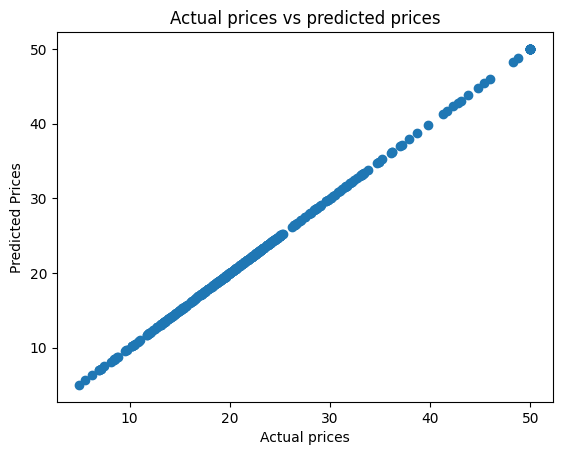

In [63]:
# visualising the predicted price with the actual price

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs predicted prices")
plt.show()